In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler
from tqdm.notebook import trange, tqdm

In [ ]:
from sklearn.datasets import load_diabetes

In [ ]:
load_diabetes().keys()

dict_keys(['data', 'target', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])

In [ ]:
data = load_diabetes()
feature_names = data.feature_names
df = pd.DataFrame(data.data, columns = feature_names)
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


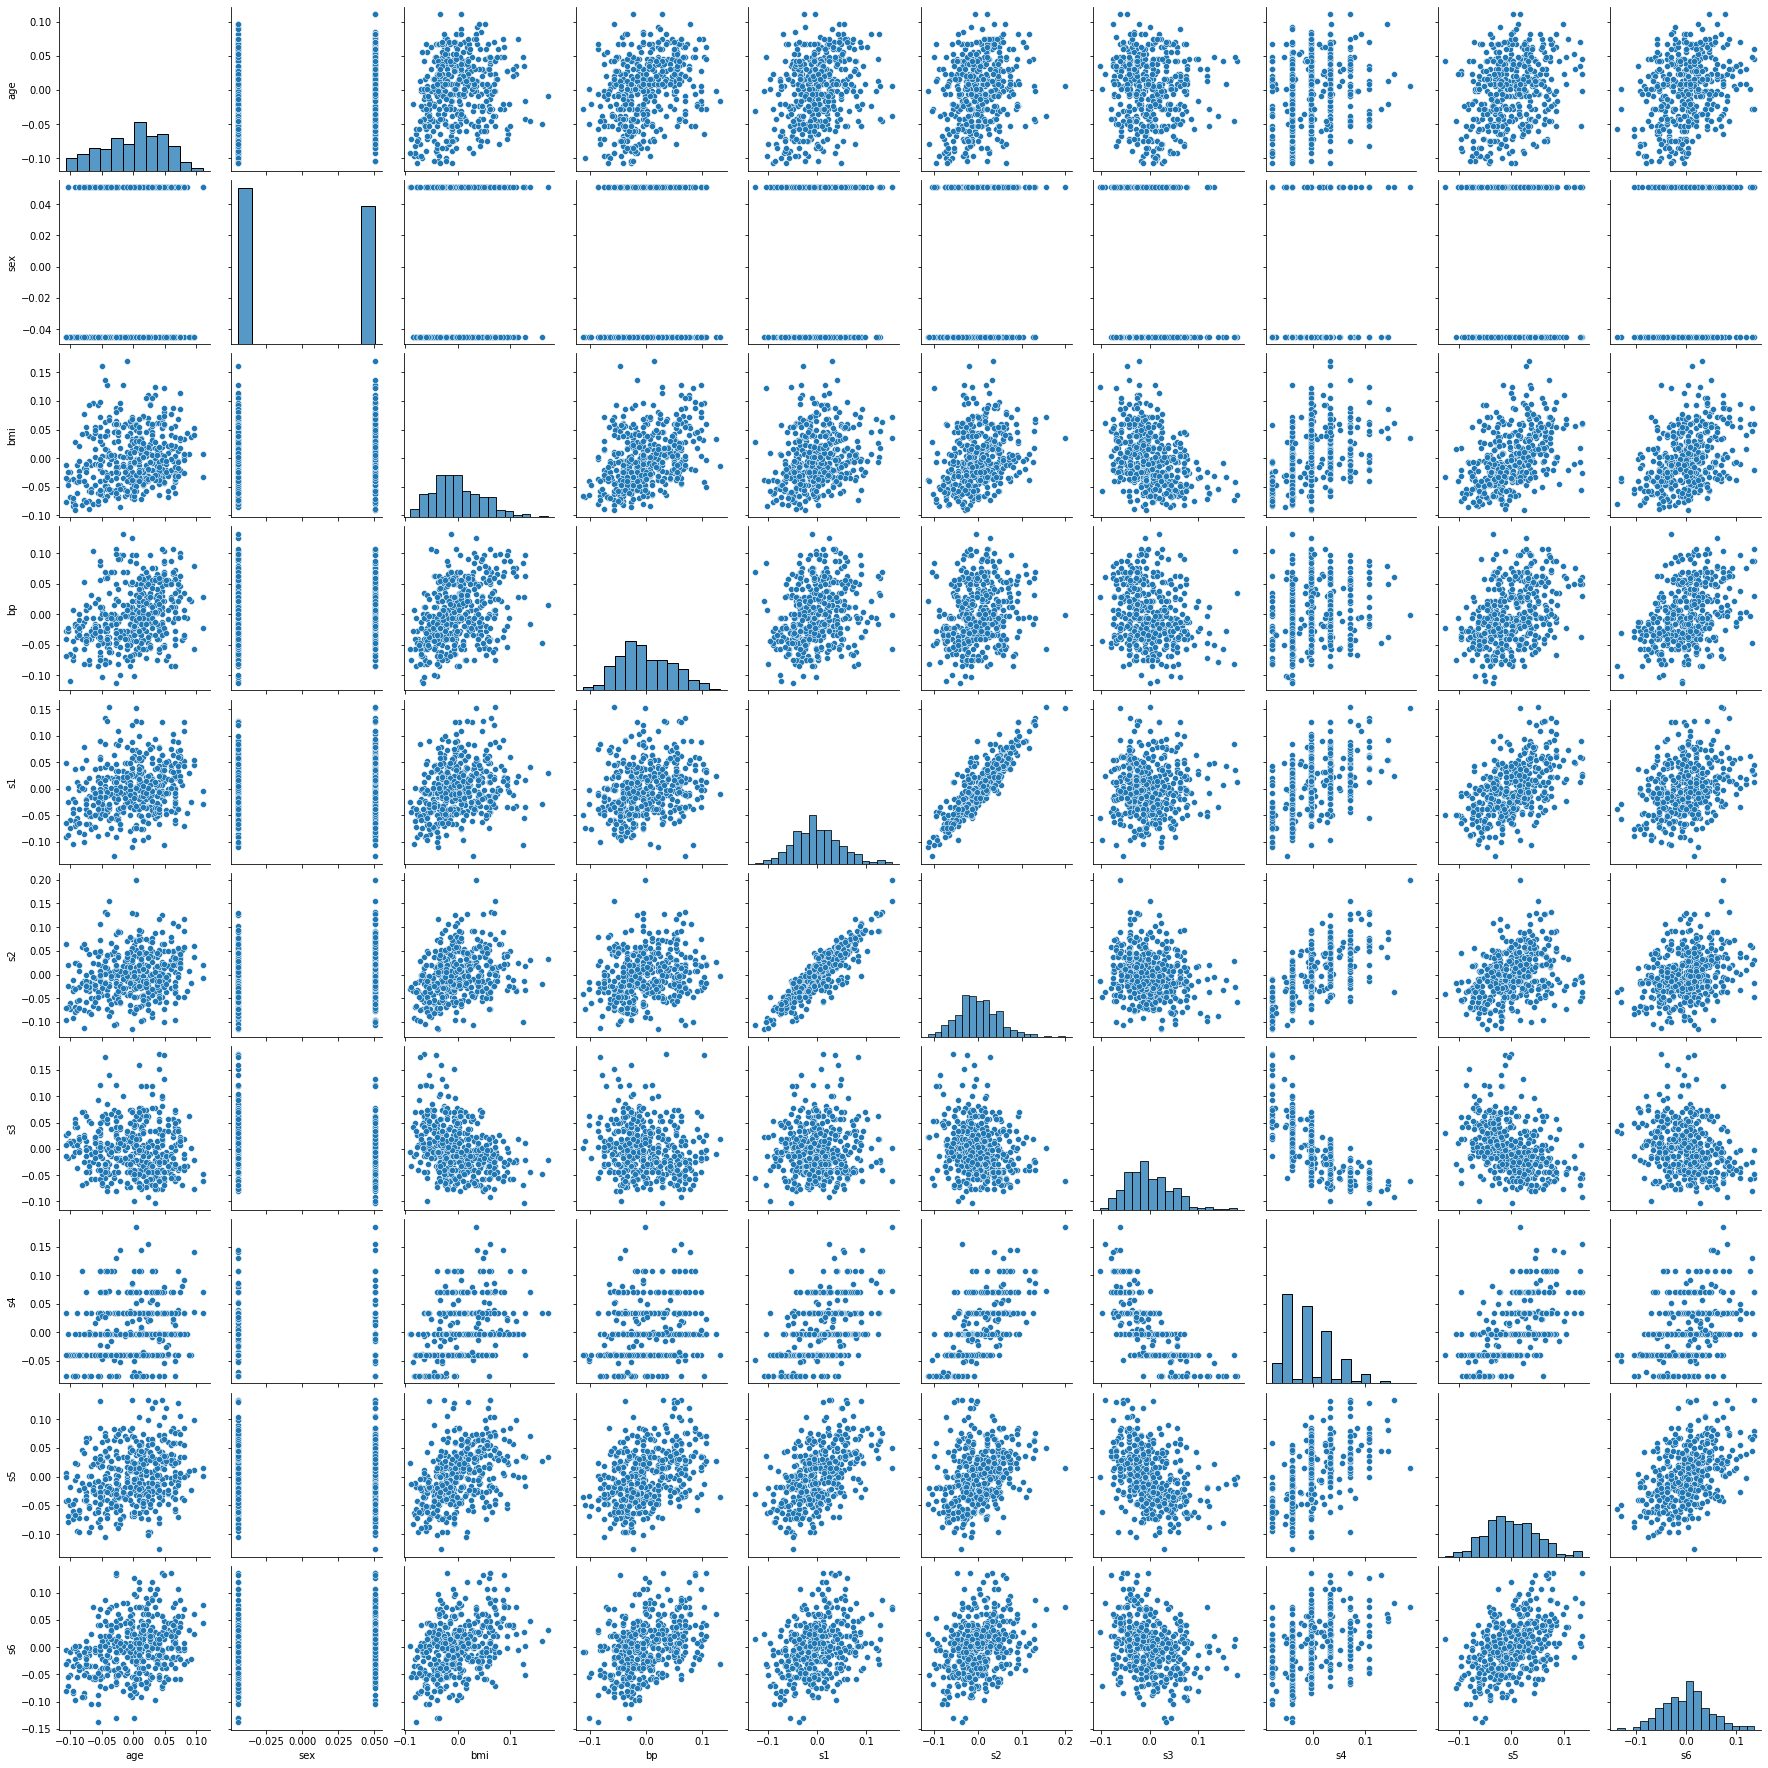

In [ ]:
sns.pairplot(df)

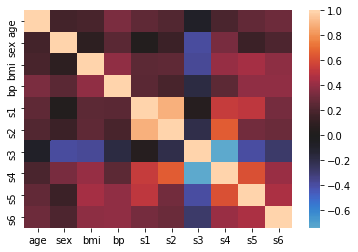

In [ ]:
cor = df.corr()
sns.heatmap(cor, center=0)

In [ ]:

prop_null = 0.1
pr = 'bmi'
pr2 = 'bp'
data = df.copy()
data.loc[np.random.randint(0,df.shape[0],int(df.shape[0]*prop_null//1)),pr] = None
data.loc[np.random.randint(0,df.shape[0],int(df.shape[0]*prop_null//1)),pr2] = None
ind = data[data[pr].isna()].index
ind2 = data[data[pr2].isna()].index
to_na = {pr:data[pr].mean(), pr2:data[pr2].mean()}
data = data.fillna(value=to_na)
delta_ = (df - data).loc[ind,pr]
delta2_ = (df - data).loc[ind2,pr2]

delta = np.abs(np.array(data.loc[ind, pr] - df.loc[ind, pr]))
delta2 = np.abs(np.array(data.loc[ind2, pr2] - df.loc[ind2, pr2]))
print('start1: ',delta.mean(),delta.std())
print('start2: ',delta2.mean(),delta2.std())
for i in trange(10):
  svd = TruncatedSVD(n_components=3).fit(data)
  data_invers = svd.inverse_transform(svd.transform(data))
  data_invers = pd.DataFrame(data_invers, columns = feature_names)
  data.loc[ind, pr] = data_invers.loc[ind, pr]
  data.loc[ind2, pr2] = data_invers.loc[ind2, pr2]
  if i%1 == 0:
     delta = np.abs(np.array(data.loc[ind, pr] - df.loc[ind, pr]))
     delta2 = np.abs(np.array(data.loc[ind2, pr2] - df.loc[ind2, pr2]))
     print(i,delta.mean(),delta.std())
     print(i,delta2.mean(),delta2.std())
print('finish: ',delta.mean(),delta.std())     
print('finish2: ',delta2.mean(),delta2.std())     

start1:  0.04265697904306019 0.03262375767789825
start2:  0.04538737006807407 0.028452753651279892


0 0.03310569816316696 0.030038927497125976
0 0.028670065648732278 0.02256981639513895
1 0.03279190396505349 0.02965754726062707
1 0.02578924710314065 0.021832568244879908
2 0.03266908731211967 0.029658900980732084
2 0.025598799770216424 0.021501003628076623
3 0.032582579185098895 0.02968439794148217
3 0.025581641085663177 0.021524304586988383
4 0.03253414510770916 0.029697830474922398
4 0.025572718479767886 0.02159545360798796
5 0.03250885750848758 0.029703782072681
5 0.02556928596603223 0.021643737467171995
6 0.032496016422908156 0.02970626083877263
6 0.02556835769664969 0.02167065815184821
7 0.0324895797330961 0.029707247364053193
7 0.02556834251225349 0.021684715867469864
8 0.03248637538696275 0.029707619670970742
8 0.025568566169370043 0.021691862136670435
9 0.032484786604212446 0.029707749160833557
9 0.02556879183001263 0.021695451670618413

finish:  0.032484786604212446 0.029707749160833557
finish2:  0.02556879183001263 0.021695451670618413


In [ ]:
_=[print(f" {x:4.3f} -> {y:4.3f}  \t{'+' if np.abs(x) > np.abs(y) else '-'}") for x,y in zip(delta_,(df - data).loc[ind,pr])]

 0.012 -> -0.028  	-
 -0.021 -> 0.003  	+
 -0.006 -> -0.041  	-
 0.045 -> 0.075  	-
 -0.065 -> -0.013  	+
 0.125 -> 0.083  	+
 0.072 -> 0.022  	+
 -0.035 -> -0.042  	-
 -0.042 -> -0.041  	+
 -0.063 -> -0.013  	+
 -0.025 -> -0.030  	-
 -0.004 -> -0.022  	-
 0.028 -> 0.015  	+
 0.041 -> 0.023  	+
 0.021 -> 0.003  	+
 0.044 -> 0.027  	+
 -0.062 -> -0.023  	+
 -0.066 -> -0.028  	+
 -0.055 -> 0.010  	+
 -0.066 -> -0.048  	+
 0.032 -> -0.007  	+
 -0.065 -> -0.052  	+
 -0.046 -> -0.007  	+
 0.098 -> 0.048  	+
 0.161 -> 0.170  	-
 -0.008 -> 0.039  	-
 0.031 -> 0.008  	+
 0.009 -> -0.014  	-
 0.034 -> 0.019  	+
 0.006 -> -0.025  	-
 -0.008 -> -0.031  	-
 -0.013 -> -0.045  	-
 -0.058 -> -0.047  	+
 -0.038 -> -0.024  	+
 0.001 -> 0.029  	-
 -0.031 -> 0.008  	+
 -0.045 -> -0.016  	+
 0.059 -> 0.086  	-
 0.009 -> 0.005  	+
 0.080 -> 0.065  	+
 -0.041 -> 0.016  	+
 0.020 -> -0.014  	+


In [ ]:
_=[print(f" {x:4.3f} -> {y:4.3f}  \t{'+' if np.abs(x) > np.abs(y) else '-'}") for x,y in zip(delta2_,(df - data).loc[ind2,pr2])]

 -0.041 -> -0.006  	+
 -0.051 -> -0.014  	+
 -0.062 -> 0.010  	+
 -0.034 -> -0.021  	+
 -0.075 -> -0.009  	+
 -0.024 -> 0.008  	+
 -0.027 -> 0.063  	-
 0.011 -> -0.008  	+
 -0.013 -> 0.001  	+
 -0.044 -> 0.059  	-
 0.104 -> 0.074  	+
 -0.069 -> 0.032  	+
 -0.017 -> -0.032  	-
 -0.020 -> 0.014  	+
 0.021 -> -0.004  	+
 -0.048 -> -0.011  	+
 0.038 -> 0.004  	+
 0.000 -> 0.024  	-
 0.052 -> 0.046  	+
 0.097 -> 0.007  	+
 0.049 -> 0.035  	+
 -0.007 -> 0.003  	+
 0.097 -> 0.067  	+
 0.004 -> -0.009  	-
 -0.034 -> 0.005  	+
 -0.065 -> -0.035  	+
 -0.007 -> 0.018  	-
 0.078 -> 0.008  	+
 -0.038 -> -0.046  	-
 0.055 -> 0.020  	+
 -0.034 -> -0.062  	-
 -0.058 -> -0.020  	+
 -0.007 -> 0.033  	-
 -0.075 -> -0.001  	+
 -0.044 -> 0.016  	+
 0.107 -> 0.076  	+
 -0.044 -> -0.037  	+
 -0.051 -> -0.030  	+
 -0.031 -> 0.007  	+
 -0.082 -> -0.048  	+
